**ANTENNA 2**

In [1]:
#Libraries
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
antenna = pd.read_csv('729.csv')

In [3]:
dff = antenna.copy()

In [4]:
dff.head()

,freq,d,giki,gucx,gx,hc,hs,lbir,ldort,lf,...,wbesy,wbir,wdort,wiki,wuc,wy,real,ima,mag,db
0,886.400024,3.0,0.5,5.0,4.0,0.2,1.6,12.5,2.0,5.0,...,86.0,25.0,21.0,50.0,36.0,112.0,0.070744,0.003329,0.070823,-22.996541
1,886.400024,2.0,0.5,5.0,4.0,0.2,1.6,12.5,2.0,4.0,...,84.0,25.0,21.0,50.0,36.0,110.0,0.100874,0.034522,0.106618,-19.443422
2,886.400024,2.0,0.5,5.0,4.0,0.2,1.6,12.5,2.0,4.0,...,84.0,25.0,21.0,50.0,36.0,112.0,0.108320,0.097620,0.145818,-16.723799
3,886.400024,2.0,0.5,5.0,4.0,0.2,1.6,12.5,2.0,4.0,...,84.0,25.0,21.0,50.0,36.0,114.0,0.128535,0.157332,0.203162,-13.843161
4,886.400024,2.0,0.5,5.0,4.0,0.2,1.6,12.5,2.0,4.0,...,84.0,25.0,21.0,50.0,36.0,110.0,0.124001,0.030880,0.127788,-17.870179


In [5]:
dfff = dff.drop(["freq","wuc","wiki", "wdort","giki", "gucx", "gx", "hc","hs","lbir","ldort", "lo", "luc", "wbir","real","ima","db"], axis=1)

In [6]:
df = dfff.copy()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
d,729.0,3.0000,0.817057,2.000000,2.000000,3.000000,4.000000,4.000000
lf,729.0,5.0000,0.817057,4.000000,4.000000,5.000000,6.000000,6.000000
lx,729.0,112.0000,1.634114,110.000000,110.000000,112.000000,114.000000,114.000000
wbesx,729.0,86.0000,1.634114,84.000000,84.000000,86.000000,88.000000,88.000000
wbesy,729.0,86.0000,1.634114,84.000000,84.000000,86.000000,88.000000,88.000000
wy,729.0,112.0000,1.634114,110.000000,110.000000,112.000000,114.000000,114.000000
mag,729.0,0.1087,0.046086,0.012419,0.074578,0.104809,0.138312,0.261498


In [8]:
df.head()

,d,lf,lx,wbesx,wbesy,wy,mag
0,3.0,5.0,112.0,86.0,86.0,112.0,0.070823
1,2.0,4.0,110.0,84.0,84.0,110.0,0.106618
2,2.0,4.0,110.0,84.0,84.0,112.0,0.145818
3,2.0,4.0,110.0,84.0,84.0,114.0,0.203162
4,2.0,4.0,112.0,84.0,84.0,110.0,0.127788


**DATA VISUALIZATION**

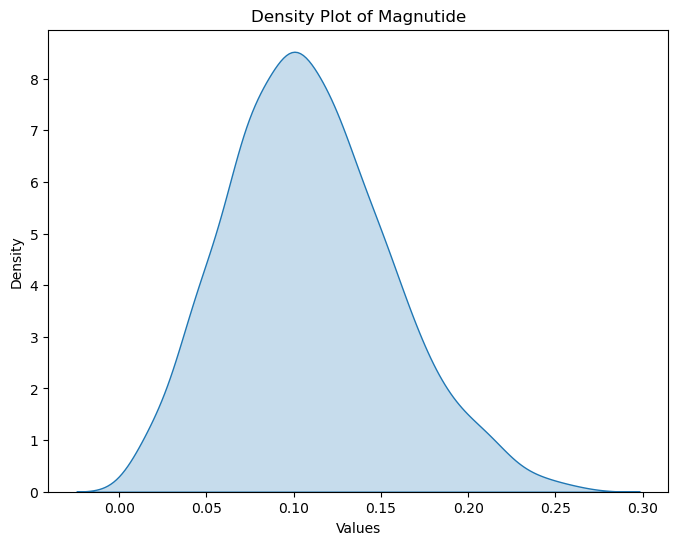

In [9]:
#Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data= df["mag"], shade=True)
plt.title('Density Plot of Magnutide')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

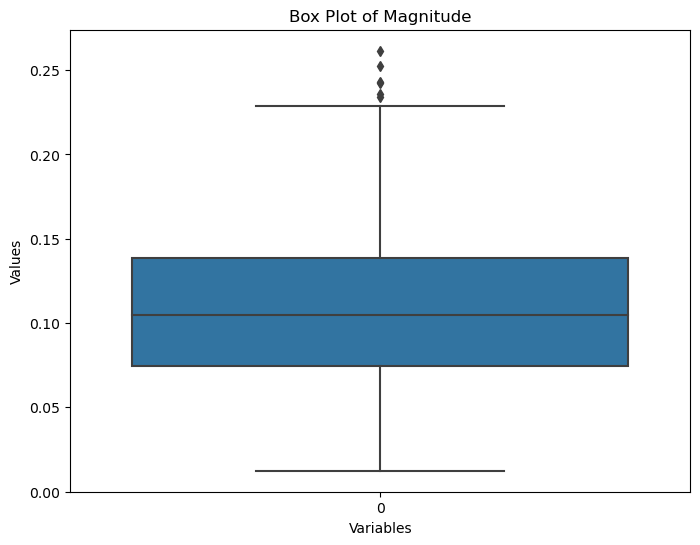

In [10]:
#Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df["mag"])
plt.title('Box Plot of Magnitude')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

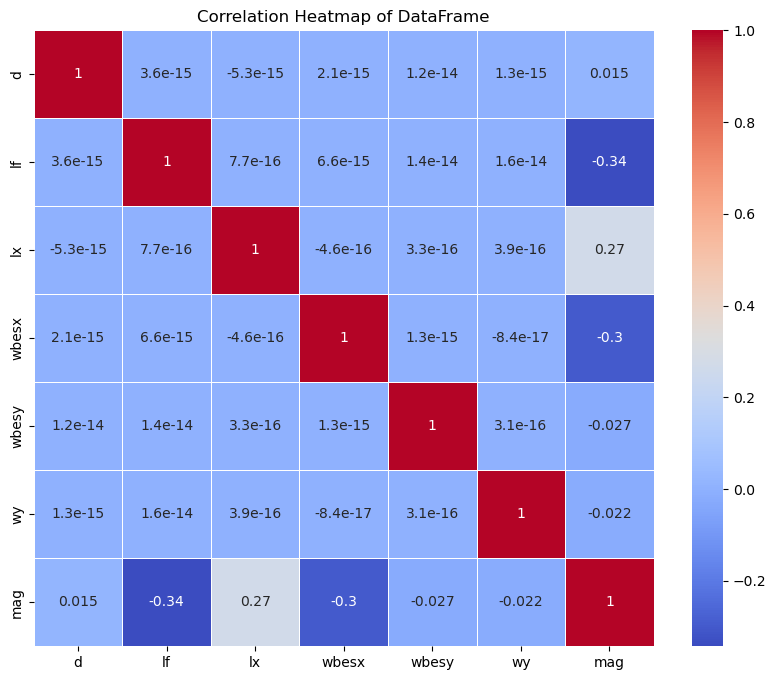

In [11]:
#Corellation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of DataFrame')
plt.show()

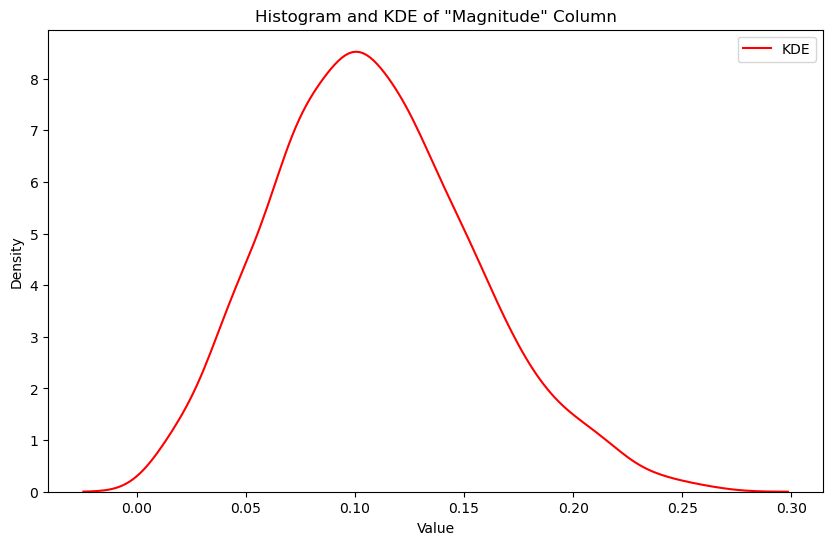

In [12]:
#Histogram of mag
plt.figure(figsize=(10, 6))
bin_edges = range(int(min(df['mag'])), int(max(df['mag'])) + 1, 1)
plt.hist(df['mag'], bins=bin_edges, density=True, alpha=0.5, edgecolor='black', label='Histogram')
sns.kdeplot(df['mag'], color='red', label='KDE')
plt.title('Histogram and KDE of "Magnitude" Column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

**RANDOM FOREST**

In [13]:
X = df.drop("mag", axis=1)
y = df["mag"]
# Separating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

In [14]:
y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", rf_mse)
print("R² Score:", rf_r2)

Mean Squared Error: 0.00017860273186866266
R² Score: 0.916284582171041


In [15]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100}, index = X_train.columns)

Text(0.5, 0, 'Variable Severity Levels')

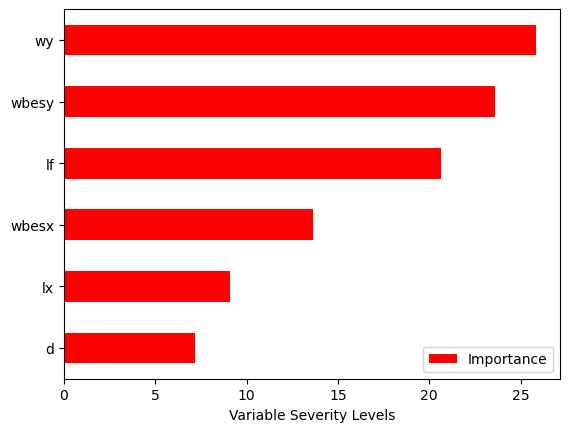

In [16]:
#Importance levels of variables for Random Forests
Importance.sort_values (by ="Importance" , axis= 0, ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Variable Severity Levels")

<Figure size 1000x600 with 0 Axes>

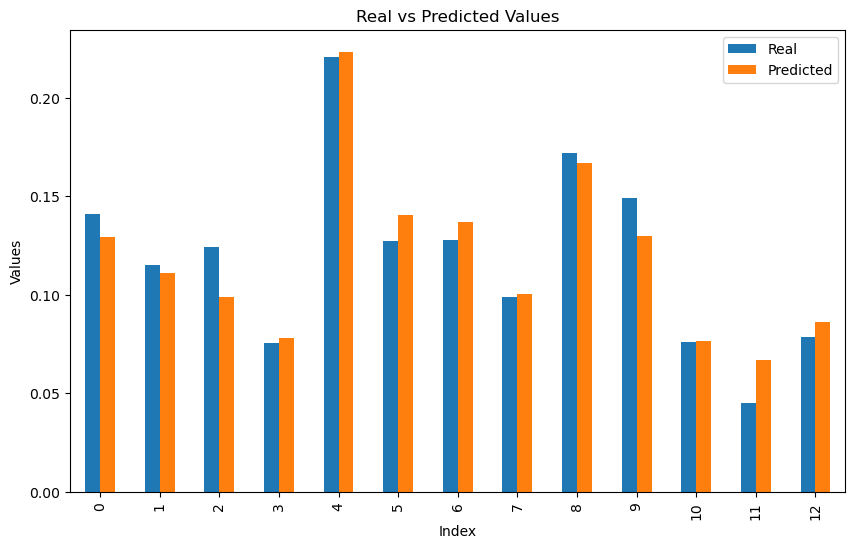

In [17]:
y_pred = rf_model.predict(X_test)

# Create a DataFrame to store real and predicted values
results_df = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred})

results_df = results_df.head(13)
# Plotting the barplot
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Real vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

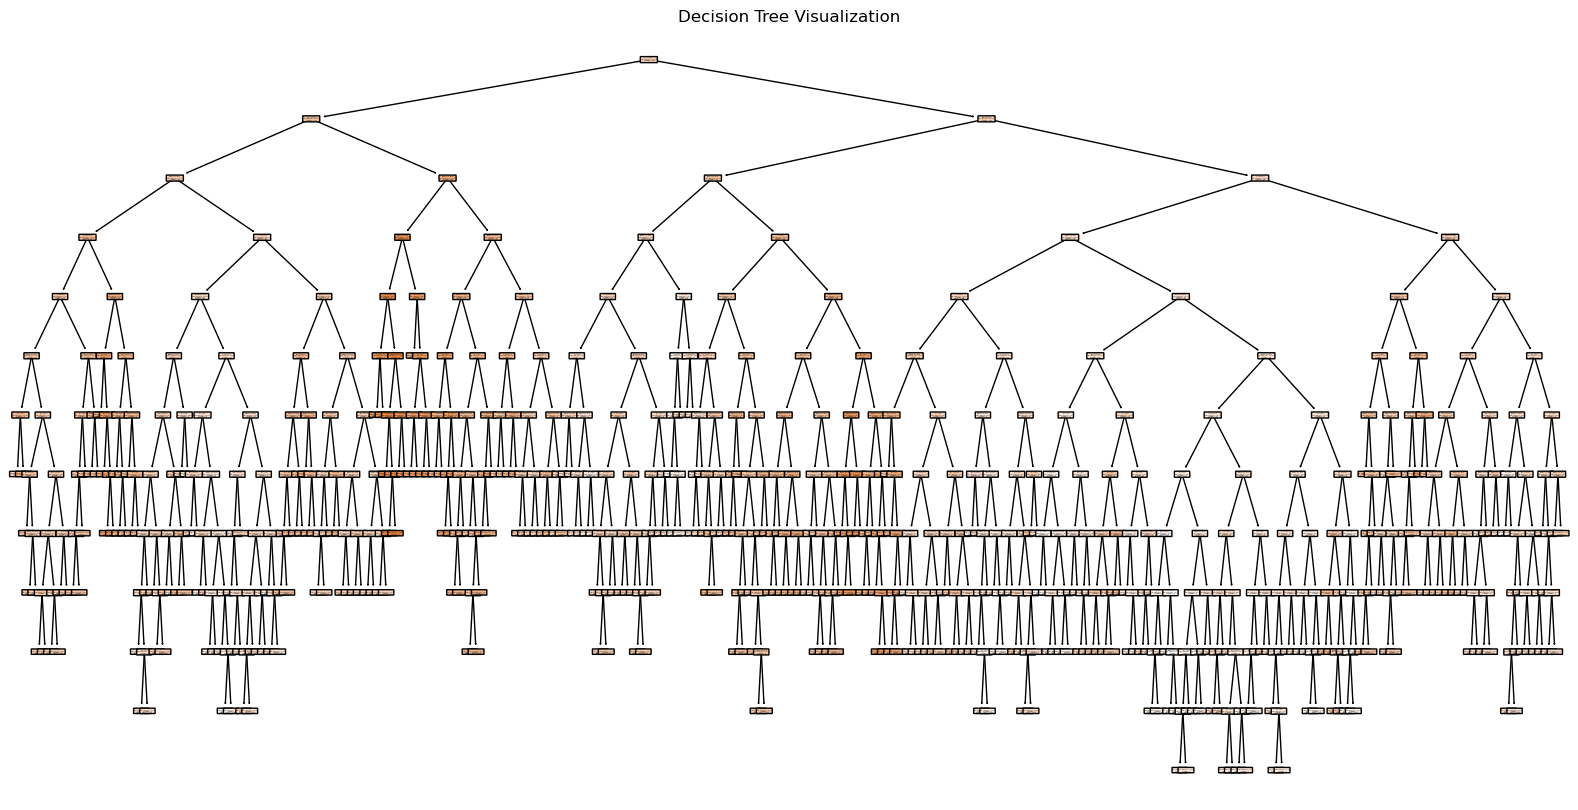

In [18]:
#Decision Tree Visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tree_to_visualize = rf_model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, filled=True, feature_names=X.columns, class_names=['mag'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Mean Squared Error (MSE): 0.00017860273186866266
R-squared (R2): 0.916284582171041


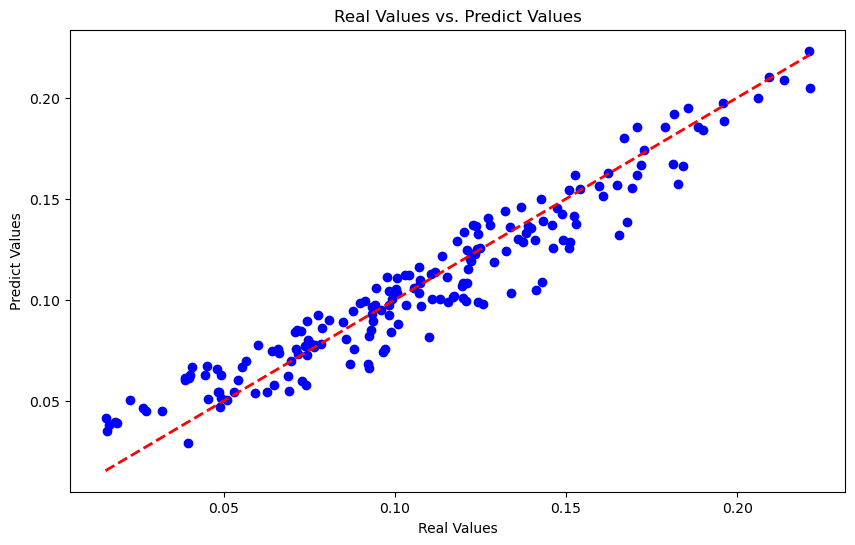

In [19]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R-squared (R2): {rf_r2}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Real Values vs. Predict Values')
plt.xlabel('Real Values')
plt.ylabel('Predict Values')
plt.show()

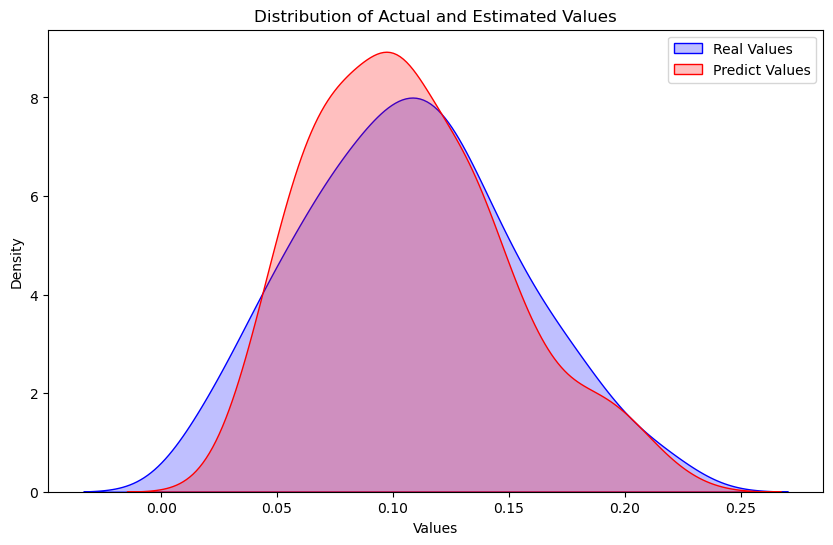

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Real Values', color='blue', fill=True)
sns.kdeplot(y_pred, label='Predict Values', color='red', fill=True)
plt.title('Distribution of Actual and Estimated Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

*RANDOM FOREST TUNED*

In [21]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 500, 1000],           
    'max_features': ['auto', 'sqrt', 'log2', None, 0.1, 0.2, 0.3],  
    'max_depth': [None, 5, 10, 15, 20],            
    'min_samples_split': [2, 5, 10, 15],           
    'min_samples_leaf': [1, 2, 4, 6]              
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

rf_tuned_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", rf_tuned_mse)

rf_tuned_r2 = r2_score(y_test, y_pred)
print("R² Score:", rf_tuned_r2)

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Mean Squared Error: 0.0001794188574490944
R² Score: 0.9159020443831142


**KNN**

In [22]:
from sklearn.neighbors import KNeighborsRegressor
# Separating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {knn_mse}")
knn_r2 = r2_score(y_test, y_pred)
print(f"R² Score: {knn_r2}")

Mean Squared Error: 0.00048360767313782255
R² Score: 0.7733213932483699


*KNN TUNED*

In [23]:
param_grid = {
    'n_neighbors': list(range(2, 20)),
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
}
knn_model_tuned_g = KNeighborsRegressor()
knn_model_tuned = GridSearchCV(knn_model_tuned_g, param_grid, cv=10, scoring='neg_mean_squared_error')
knn_model_tuned.fit(X_train, y_train)
print("Best Parameters: ", knn_model_tuned.best_params_)

y_pred_grid = knn_model_tuned.predict(X_test)
mse_knn_tuned = mean_squared_error(y_test, y_pred_grid)
print(f"Mean Squared Error: {mse_knn_tuned}")
r2_knn_tuned = r2_score(y_test, y_pred_grid)
print(f"R² Score: {r2_knn_tuned}")

Best Parameters:  {'algorithm': 'brute', 'n_neighbors': 8, 'weights': 'distance'}
Mean Squared Error: 0.00045494347087014477
R² Score: 0.7867569977571354


<Figure size 1000x600 with 0 Axes>

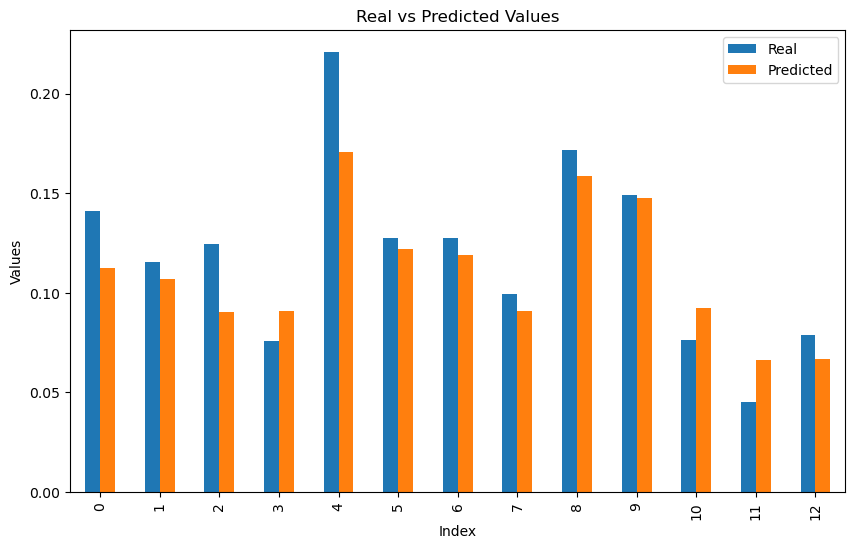

In [24]:
y_pred = knn_model_tuned.predict(X_test)

# Create a DataFrame to store real and predicted values
results_df = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred_grid})

results_df = results_df.iloc[0:13]
# Plotting the barplot
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Real vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

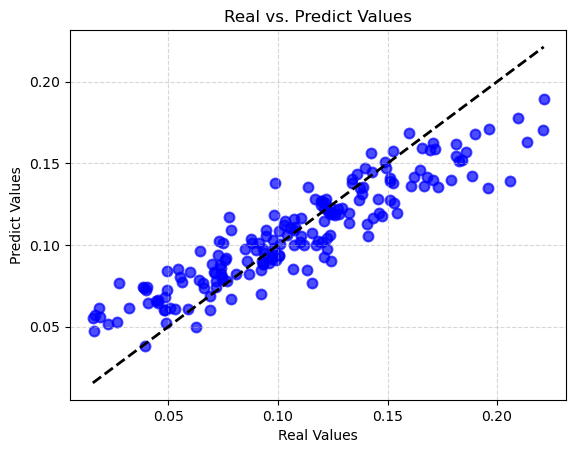

In [25]:
plt.scatter(y_test, y_pred_grid, alpha=0.7, c='b', s=50,  linewidths=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title("Real vs. Predict Values")
plt.show()

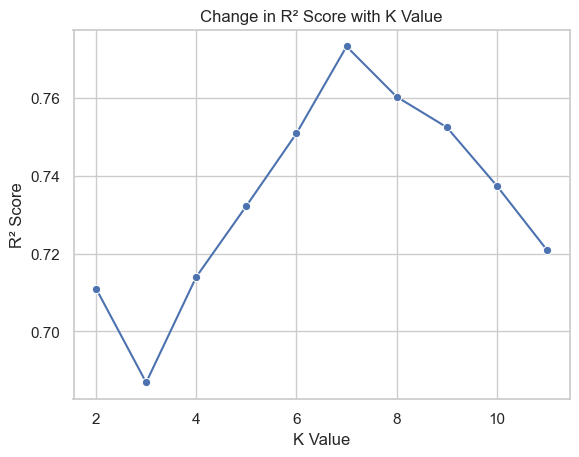

In [26]:
k_values = list(range(2,12))
r2_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

data = {'K Value': k_values, 'R² Score': r2_scores}
df = pd.DataFrame(data)
sns.set(style='whitegrid')
sns.lineplot(x='K Value', y='R² Score', data=df, marker='o')
plt.title('Change in R² Score with K Value')
plt.show()

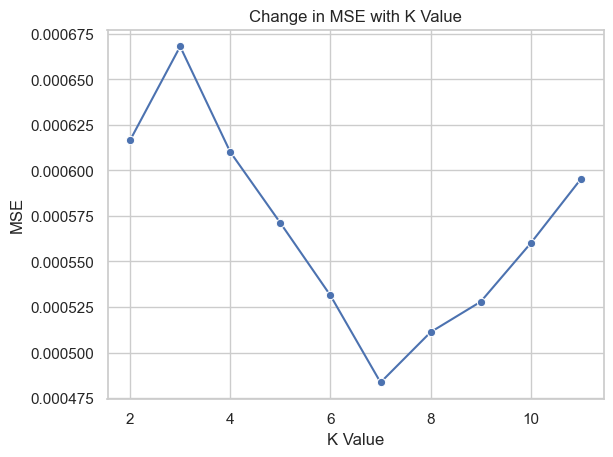

In [27]:
k_values = list(range(2, 12))
mse_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

data = {'K Value': k_values, 'MSE': mse_scores}
df = pd.DataFrame(data)
sns.set(style='whitegrid')
sns.lineplot(x='K Value', y='MSE', data=df, marker='o')
plt.title('Change in MSE with K Value')
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.show()

**POLYNOMIAL REGRESSION**

In [28]:
# Separating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
degree = 4
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

y_test_pred = poly_model.predict(X_test)
mse_poly = (mean_squared_error(y_test, y_test_pred))
print(f'Mean Squared Error(MSE): {mse_poly}')
r2_poly = r2_score(y_test, y_test_pred)
print(f'R² Score: {r2_poly}')

Mean Squared Error(MSE): 3.902977159925209e-05
R² Score: 0.9822153613003166


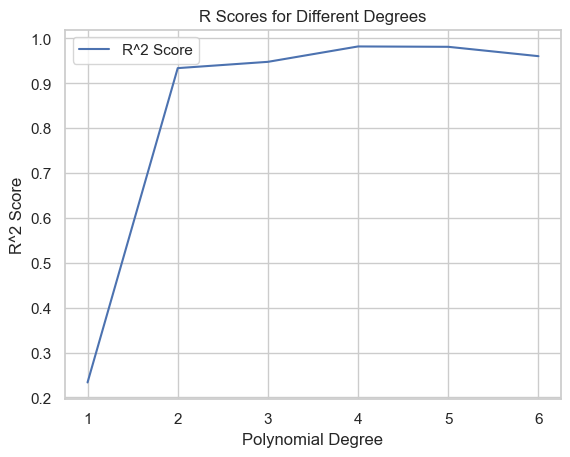

In [29]:
degrees = list(range(1, 7))  
test_r2_scores = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    test_r2_scores.append(r2_test)

sns.set(style='whitegrid')
plt.plot(degrees, test_r2_scores, label='R^2 Score')
plt.title('R Scores for Different Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

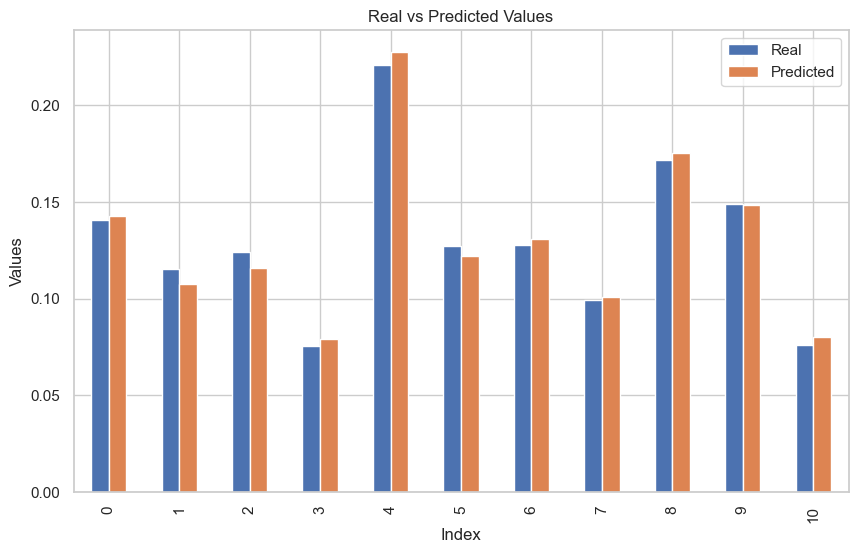

In [30]:
y_pred = poly_model.predict(X_test)

# Create a DataFrame to store real and predicted values
results_df = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred})
results_df = results_df.iloc[0:11]

# Plotting the barplot
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Real vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

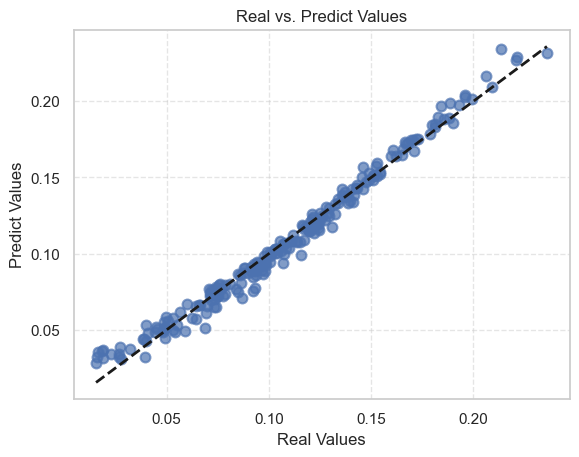

In [31]:
plt.scatter(y_test, y_pred, alpha=0.7, c='b', s=50,  linewidths=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title("Real vs. Predict Values")
plt.show()

**LINEAR REGRESSION**

In [32]:
from sklearn.linear_model import LinearRegression

# Separating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}

grid_search = GridSearchCV(linear_model, param_grid, cv=10, scoring='r2')

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions on testing data using the best model
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Calculate R² and MSE on testing data
linear_r2 = r2_score(y_test, y_test_pred)
linear_mse = mean_squared_error(y_test, y_test_pred)

print("Best Params:", best_params)
print("R² Score:", linear_r2)
print("MSE:", linear_mse)

Best Params: {'copy_X': True, 'fit_intercept': False, 'positive': False}
R² Score: 0.23134525453784294
MSE: 0.001686872567987751


**RIDGE REGRESSION**

In [33]:
from sklearn.linear_model import Ridge

# Define the Ridge Regresyon model
ridge_model = Ridge()

# Define the parameter grid for Ridge Regresyon
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100],  # Ridge regression parameter (regularization coefficient)
    'fit_intercept': [True, False],  #Truncation term
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], # Solution algorithm of Ridge regression
    'tol': [0.001, 0.01, 0.1]  # Stopping criterion of the optimization algorithm
}

# Initialize GridSearchCV with cross-validation
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Make predictions on test data using the best model
y_test_pred_ridge = best_model_ridge.predict(X_test)

# Calculate MSE and R² on test data
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)

print("Best Params (Ridge Regression):", best_params_ridge)
print("MSE:", mse_ridge)
print("R² Score:", r2_ridge)

Best Params (Ridge Regression): {'alpha': 10, 'fit_intercept': False, 'solver': 'svd', 'tol': 0.001}
MSE: 0.0016857811657152845
R² Score: 0.23184257220834148


**LASSO REGRESSION**

In [34]:
from sklearn.linear_model import Lasso

# Define the Lasso Regresyon model
lasso_model = Lasso()

# Define the parameter grid for Lasso Regresyon
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100],  # Regularization coefficient
    'fit_intercept': [True, False], #Truncation term
    'max_iter': [1000, 2000, 3000], # Maximum number of iterations of the optimization algorithm
    'tol': [0.001, 0.01, 0.1]  # Stopping criterion of the optimization algorithm
}

# Initialize GridSearchCV with cross-validation
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_lasso.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

# Make predictions on test data using the best model
y_test_pred_lasso = best_model_lasso.predict(X_test)

# Calculate MSE and R^2 on test data
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_lasso = r2_score(y_test, y_test_pred_lasso)

print("Best Params (Lasso Regression):", best_params_lasso)
print("MSE:", mse_lasso)
print("R² Score:", r2_lasso)

Best Params (Lasso Regression): {'alpha': 0.1, 'fit_intercept': False, 'max_iter': 1000, 'tol': 0.001}
MSE: 0.0021600201520735308
R² Score: 0.015746789832635555


**ELASTICNET REGRESSION**

In [35]:
from sklearn.linear_model import ElasticNet

# Define the ElasticNet model
elasticnet_model = ElasticNet()

# Define the parameter grid for ElasticNet
param_grid_elasticnet = {
    'alpha': [0.1, 1, 10, 100],  # Regulation coefficient
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],  # L1 ratio
    'fit_intercept': [True, False],  # Truncation term
    'max_iter': [1000, 2000, 3000],  # Maximum number of iterations of the optimization algorithm
    'tol': [0.001, 0.01, 0.1]  # Stopping criterion of the optimization algorithm
}

# Initialize GridSearchCV with cross-validation
grid_search_elasticnet = GridSearchCV(elasticnet_model, param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_elasticnet.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_elasticnet = grid_search_elasticnet.best_params_
best_model_elasticnet = grid_search_elasticnet.best_estimator_

# Make predictions on test data using the best model
y_test_pred_elasticnet = best_model_elasticnet.predict(X_test)

# Calculate MSE and R^2 on test data
mse_elasticnet = mean_squared_error(y_test, y_test_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_test_pred_elasticnet)

print("Best Params (ElasticNet Regression):", best_params_elasticnet)
print("MSE:", mse_elasticnet)
print("R² Score:", r2_elasticnet)

Best Params (ElasticNet Regression): {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'tol': 0.1}
MSE: 0.0018671296956959788
R² Score: 0.14920775390755614


**LINEAR SVR**

In [36]:
from sklearn.svm import LinearSVR

# Define the LinearSVR model
linear_svr_model = LinearSVR()

# Define the parameter grid for LinearSVR
param_grid_linear_svr = {
    'epsilon': [0.1, 0.2, 0.5], # Acceptable margin of error for generating support vectors
    'C': [0.1, 1, 10, 100],  # Regulation coefficient
    'fit_intercept': [True, False],  # Truncation term
    'max_iter': [1000, 2000, 3000],  # Maximum number of iterations of the optimization algorithm
    'tol': [0.001, 0.01, 0.1]  # Stopping criterion of the optimization algorithm
}

# Initialize GridSearchCV with cross-validation
grid_search_linear_svr = GridSearchCV(linear_svr_model, param_grid_linear_svr, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_linear_svr.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_linear_svr = grid_search_linear_svr.best_params_
best_model_linear_svr = grid_search_linear_svr.best_estimator_

# Make predictions on test data using the best model
y_test_pred_linear_svr = best_model_linear_svr.predict(X_test)

# Calculate MSE and R^2 on test data
mse_linear_svr = mean_squared_error(y_test, y_test_pred_linear_svr)
r2_linear_svr = r2_score(y_test, y_test_pred_linear_svr)

print("Best Params (Linear SVR):", best_params_linear_svr)
print("MSE:", mse_linear_svr)
print("R² Score:", r2_linear_svr)

Best Params (Linear SVR): {'C': 1, 'epsilon': 0.1, 'fit_intercept': False, 'max_iter': 2000, 'tol': 0.1}
MSE: 0.0025918426568861236
R² Score: -0.1810211366963379


**NONLINEAR SVR**

In [37]:
from sklearn.svm import SVR

# Define the SVR model
svr_model = SVR()

# Define the parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'C': [0.1, 0.4, 1, 5, 10, 20, 30, 40, 50, 100],  # Regulation coefficient
}
# Initialize GridSearchCV with cross-validation
grid_search_svr = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_svr.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_svr = grid_search_svr.best_params_
best_model_svr = grid_search_svr.best_estimator_

# Make predictions on test data using the best model
y_test_pred_svr = best_model_svr.predict(X_test)

# Calculate MSE and R² on test data
mse_svr = mean_squared_error(y_test, y_test_pred_svr)
r2_svr = r2_score(y_test, y_test_pred_svr)

print("Best Params (SVR):", best_params_svr)
print("MSE:", mse_svr)
print("R² Score:", r2_svr)

Best Params (SVR): {'C': 0.1, 'kernel': 'poly'}
MSE: 0.002333498930053577
R² Score: -0.06330203013270674


**NEURAL NETWORKS**

In [38]:
from sklearn.neural_network import MLPRegressor

# Define the MLPRegressor model
mlp_model = MLPRegressor()

# Define the parameter grid for MLPRegressor
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],  # Hidden layes
    'activation': ['relu', 'tanh', 'logistic'],  # Activation function
    'solver': ['adam', 'lbfgs', 'sgd'],  # Optimization algorithm
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.02, 1],  # Regulation coefficient
    'learning_rate': ['constant', 'adaptive'],  # Learning rate
}

# Initialize GridSearchCV with cross-validation
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_mlp = grid_search_mlp.best_params_
best_model_mlp = grid_search_mlp.best_estimator_

# Make predictions on test data using the best model
y_test_pred_mlp = best_model_mlp.predict(X_test)

# Calculate MSE and R² on test data
mse_mlp = mean_squared_error(y_test, y_test_pred_mlp)
r2_mlp = r2_score(y_test, y_test_pred_mlp)

print("Best Params (MLPRegressor):", best_params_mlp)
print("MSE:", mse_mlp)
print("R²:", r2_mlp)

Best Params (MLPRegressor): {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
MSE: 0.00030335192259642394
R²: 0.8617720749783967


**CART**

In [39]:
from sklearn.tree import DecisionTreeRegressor

# Define the DecisionTreeRegressor model
tree_model = DecisionTreeRegressor()

# Define the parameter grid for DecisionTreeRegressor
param_grid_tree = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Split criteria
    'max_depth': [None, 5, 10, 20, 30],  # Max depth
    'min_samples_split': [2, 5, 10],  # Minimum number of instances required before splitting a node
    'min_samples_leaf': [1, 2, 4], # Minimum number of instances required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Maximum number of features to consider in the split
}

# Initialize GridSearchCV with cross-validation
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_tree.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_tree = grid_search_tree.best_params_
best_model_tree = grid_search_tree.best_estimator_

# Make predictions on test data using the best model
y_test_pred_tree = best_model_tree.predict(X_test)

# Calculate MSE and R^2 on test data
mse_tree = mean_squared_error(y_test, y_test_pred_tree)
r2_tree = r2_score(y_test, y_test_pred_tree)

print("Best Params (DecisionTreeRegressor):", best_params_tree)
print("MSE:", mse_tree)
print("R² Score:", r2_tree)

Best Params (DecisionTreeRegressor): {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
MSE: 0.00033371854361067616
R² Score: 0.8479349613817843


**BAGGED TREES**

In [40]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Define the base regressor
base_regressor = DecisionTreeRegressor()

# Define the BaggingRegressor model
bagging_model = BaggingRegressor(base_estimator=base_regressor)

# Define the parameter grid for BaggingRegressor
param_grid_bagging = {
    'n_estimators': [10, 50, 100],  # Number of base predictors
    'max_samples': [0.5, 0.8, 1.0],  # Sampling rate
    'max_features': [0.5, 0.8, 1.0],  # Subset size of features
    'bootstrap': [True, False]  # Data sampling method
}

# Initialize GridSearchCV with cross-validation
grid_search_bagging = GridSearchCV(bagging_model, param_grid_bagging, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_bagging.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_bagging = grid_search_bagging.best_params_
best_model_bagging = grid_search_bagging.best_estimator_

# Make predictions on test data using the best model
y_test_pred_bagging = best_model_bagging.predict(X_test)

# Calculate MSE and R^2 on test data
mse_bagging = mean_squared_error(y_test, y_test_pred_bagging)
r2_bagging = r2_score(y_test, y_test_pred_bagging)

print("Be Params (BaggingRegressor):", best_params_bagging)
print("MSE:", mse_bagging)
print("R² Score:", r2_bagging)

Be Params (BaggingRegressor): {'bootstrap': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
MSE: 0.000233189038910752
R² Score: 0.8937430931357639


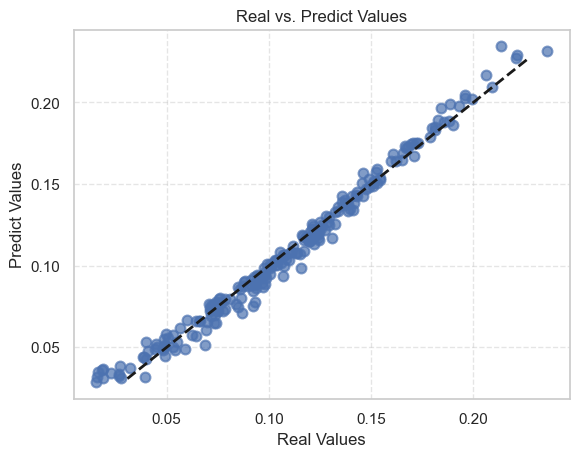

In [41]:
plt.scatter(y_test, y_pred, alpha=0.7, c='b', s=50,  linewidths=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([min(y_test_pred_bagging), max(y_test_pred_bagging)], [min(y_test_pred_bagging), max(y_test_pred_bagging)], 'k--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title("Real vs. Predict Values")
plt.show()

**Gradient Boosting Machine (GBM)**

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the GradientBoostingRegressor model
gbm_model = GradientBoostingRegressor()

# Define the parameter grid for GradientBoostingRegressor
param_grid_gbm = {
    'n_estimators': [50, 100, 200],     # Number of base predictors
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5],             # Depth
    'min_samples_split': [2, 5, 10],    # Minimum number of instances required before splitting a node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of instances required in a leaf node
}

# Initialize GridSearchCV with cross-validation
grid_search_gbm = GridSearchCV(gbm_model, param_grid_gbm, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_gbm.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_gbm = grid_search_gbm.best_params_
best_model_gbm = grid_search_gbm.best_estimator_

# Make predictions on test data using the best model
y_test_pred_gbm = best_model_gbm.predict(X_test)

# Calculate MSE and R^2 on test data
mse_gbm = mean_squared_error(y_test, y_test_pred_gbm)
r2_gbm = r2_score(y_test, y_test_pred_gbm)

print("Best Params (GradientBoostingRegressor):", best_params_gbm)
print("MSE:", mse_gbm)
print("R² Score:", r2_gbm)

Best Params (GradientBoostingRegressor): {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE: 4.290453356447609e-05
R² Score: 0.9804497542066767


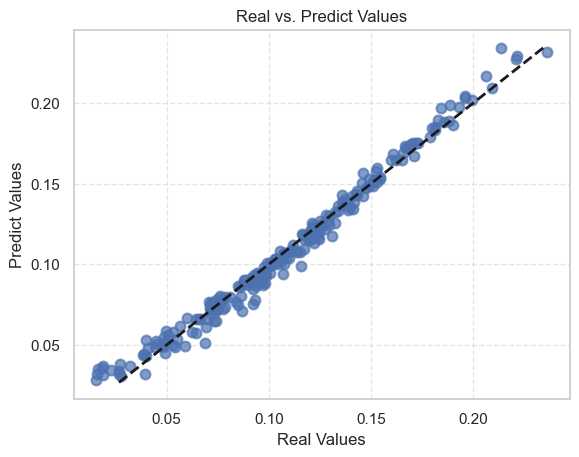

In [43]:
plt.scatter(y_test, y_pred, alpha=0.7, c='b', s=50,  linewidths=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([min(y_test_pred_gbm), max(y_test_pred_gbm)], [min(y_test_pred_gbm), max(y_test_pred_gbm)], 'k--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title("Real vs. Predict Values")
plt.show()

**XGBoost**

In [44]:
import xgboost as xgb

# Define the XGBRegressor model
xgb_model = xgb.XGBRegressor()

# Define the parameter grid for XGBRegressor
param_grid_xgb = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 4, 5],  
    'subsample': [0.5, 0.8, 1.0],  
    'colsample_bytree': [0.5, 0.8, 1.0],  # Subset size for decision tree features
}

# Initialize GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

# Make predictions on test data using the best model
y_test_pred_xgb = best_model_xgb.predict(X_test)

# Calculate MSE and R^2 on test data
mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("Best Params (XGBRegressor):", best_params_xgb)
print("MSE:", mse_xgb)
print("R² Score:", r2_xgb)

Best Params (XGBRegressor): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}
MSE: 5.118259006299079e-05
R² Score: 0.9766777043603878


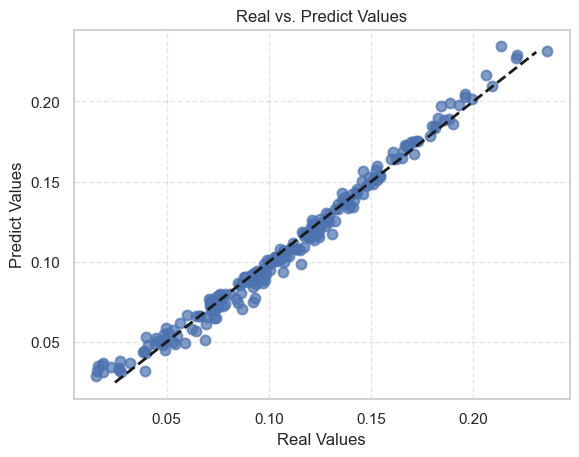

In [45]:
plt.scatter(y_test, y_pred, alpha=0.7, c='b', s=50,  linewidths=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([min(y_test_pred_xgb), max(y_test_pred_xgb)], [min(y_test_pred_xgb), max(y_test_pred_xgb)], 'k--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title("Real vs. Predict Values")
plt.show()

**LIGHTGBM**

In [46]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the LGBMRegressor model
lgb_model = lgb.LGBMRegressor(verbose=-1)

# Define the parameter grid for LGBMRegressor
param_grid_lgb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 4, 5],  
    'subsample': [0.5, 0.8, 1.0],  
    'colsample_bytree': [0.5, 0.8, 1.0], 
}

grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_lgb.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_lgb = grid_search_lgb.best_params_
best_model_lgb = grid_search_lgb.best_estimator_

# Make predictions on test data using the best model
y_test_pred_lgb = best_model_lgb.predict(X_test)

# Calculate MSE and R^2 on test data
mse_lgb = mean_squared_error(y_test, y_test_pred_lgb)
r2_lgb = r2_score(y_test, y_test_pred_lgb)

# Print the desired results
print("Best Parameters:", best_params_lgb)
print("MSE:", mse_lgb)
print("R² Score:", r2_lgb)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}
MSE: 4.987584904729048e-05
R² Score: 0.9772731451197371


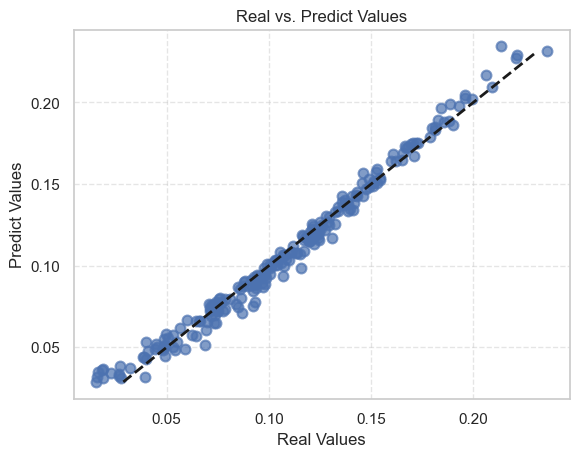

In [47]:
plt.scatter(y_test, y_pred, alpha=0.7, c='b', s=50,  linewidths=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([min(y_test_pred_lgb), max(y_test_pred_lgb)], [min(y_test_pred_lgb), max(y_test_pred_lgb)], 'k--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title("Real vs. Predict Values")
plt.show()

**CATBOOST**

In [48]:
from catboost import CatBoostRegressor
# Define the CatBoostRegressor model
catboost_model = CatBoostRegressor(verbose = 0)

# Define the parameter grid for CatBoostRegressor
param_grid_catboost = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'depth': [3, 4, 5],  
}

# Initialize GridSearchCV with cross-validation
grid_search_catboost = GridSearchCV(catboost_model, param_grid_catboost, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_catboost.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_catboost = grid_search_catboost.best_params_
best_model_catboost = grid_search_catboost.best_estimator_

# Make predictions on test data using the best model
y_test_pred_catboost = best_model_catboost.predict(X_test)

# Calculate MSE and R^2 on test data
mse_catboost = mean_squared_error(y_test, y_test_pred_catboost)
r2_catboost = r2_score(y_test, y_test_pred_catboost)

print("Best Params (CatBoostRegressor):", best_params_catboost)
print("MSE:", mse_catboost)
print("R² Score:", r2_catboost)

Best Params (CatBoostRegressor): {'depth': 5, 'learning_rate': 0.2, 'n_estimators': 200}
MSE: 2.019496821642487e-05
R² Score: 0.9907977884941661


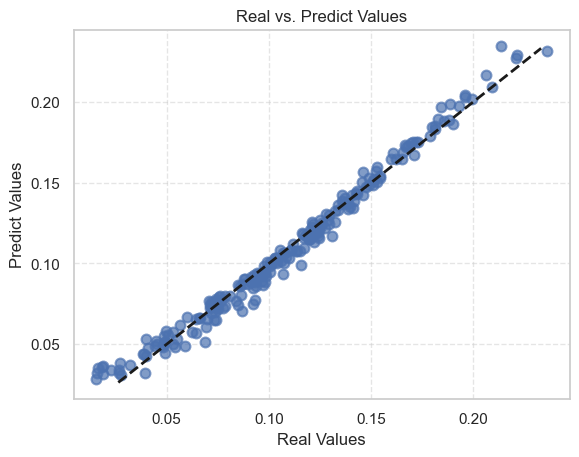

In [49]:
plt.scatter(y_test, y_pred, alpha=0.7, c='b', s=50,  linewidths=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([min(y_test_pred_catboost), max(y_test_pred_catboost)], [min(y_test_pred_catboost), max(y_test_pred_catboost)], 'k--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title("Real vs. Predict Values")
plt.show()

**GAUSSIAN**

In [50]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the GaussianProcessRegressor model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gaussian_model = GaussianProcessRegressor(kernel=kernel)

# Define the parameter grid for GaussianProcessRegressor (not applicable for kernel parameters in this case)
param_grid_gaussian = {
    'normalize_y': [True, False], # Will the target variable be normalized?
}

# Initialize GridSearchCV with cross-validation
grid_search_gaussian = GridSearchCV(gaussian_model, param_grid_gaussian, cv=5, scoring='neg_mean_squared_error')

# Fit the model on training data
grid_search_gaussian.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_gaussian = grid_search_gaussian.best_params_
best_model_gaussian = grid_search_gaussian.best_estimator_

# Make predictions on test data using the best model
y_test_pred_gaussian = best_model_gaussian.predict(X_test)

# Calculate MSE and R² on test data
mse_gaussian = mean_squared_error(y_test, y_test_pred_gaussian)
r2_gaussian = r2_score(y_test, y_test_pred_gaussian)

print("Best Params (GaussianProcessRegressor):", best_params_gaussian)
print("MSE:", mse_gaussian)
print("R² Score:", r2_gaussian)

Best Params (GaussianProcessRegressor): {'normalize_y': True}
MSE: 4.7848374394601055e-05
R² Score: 0.9781970015168762


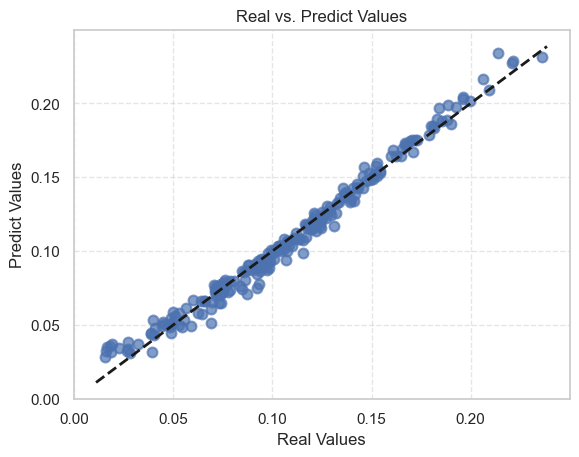

In [51]:
plt.scatter(y_test, y_pred, alpha=0.7, c='b', s=50,  linewidths=1.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot([min(y_test_pred_gaussian), max(y_test_pred_gaussian)], [min(y_test_pred_gaussian), max(y_test_pred_gaussian)], 'k--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.title("Real vs. Predict Values")
plt.show()

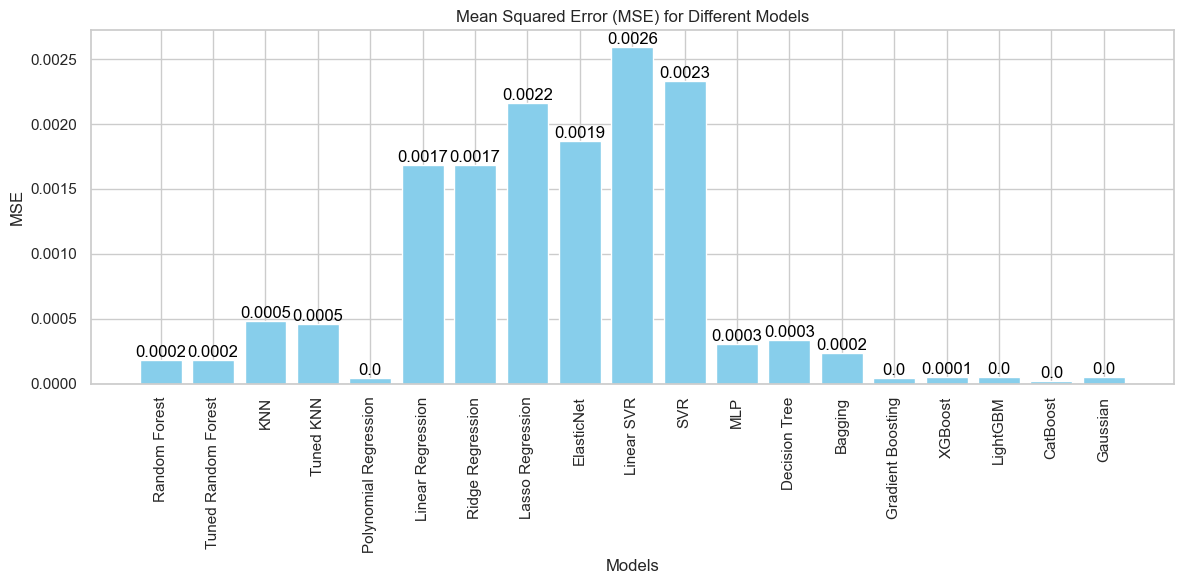

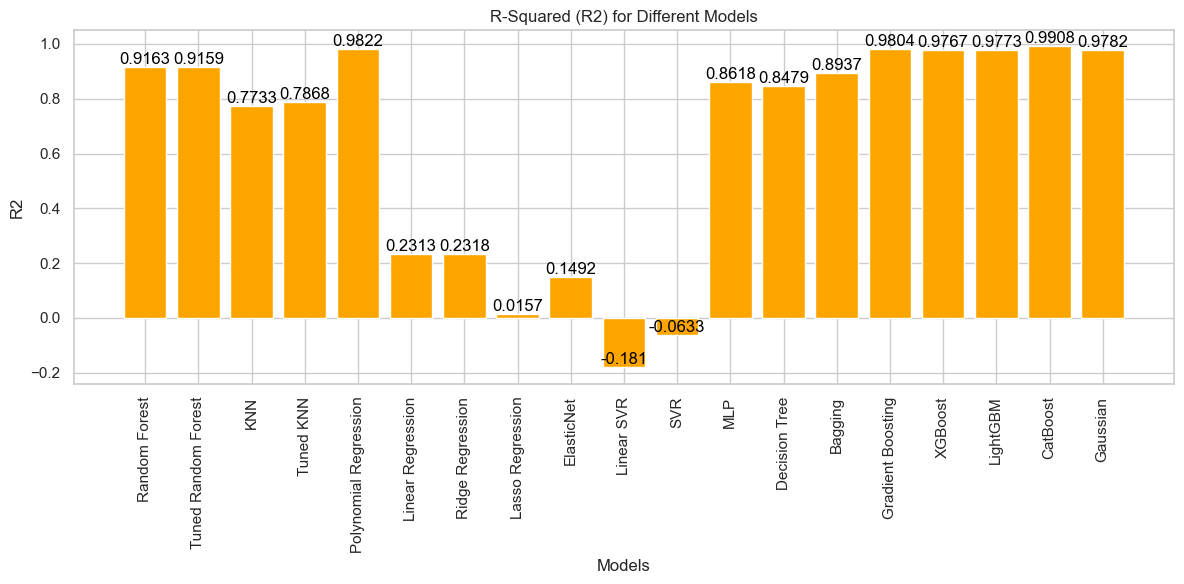

In [55]:
methods = ['Random Forest', 'Tuned Random Forest', 'KNN', 'Tuned KNN', 'Polynomial Regression', 'Linear Regression',
           'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'Linear SVR', 'SVR', 'MLP', 'Decision Tree',
           'Bagging', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost', 'Gaussian']
mse_values = [rf_mse, rf_tuned_mse, knn_mse, mse_knn_tuned, mse_poly, linear_mse,
              mse_ridge, mse_lasso, mse_elasticnet, mse_linear_svr, mse_svr, mse_mlp,
              mse_tree, mse_bagging, mse_gbm, mse_xgb, mse_lgb, mse_catboost, mse_gaussian]
r2_values = [rf_r2, rf_tuned_r2, knn_r2, r2_knn_tuned, r2_poly, linear_r2,
             r2_ridge, r2_lasso, r2_elasticnet, r2_linear_svr, r2_svr, r2_mlp,
             r2_tree, r2_bagging, r2_gbm, r2_xgb, r2_lgb, r2_catboost, r2_gaussian]

plt.figure(figsize=(12, 6))
bars_mse = plt.bar(methods, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=90)

for bar, value in zip(bars_mse, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             round(value, 4), 
             ha='center', 
             va='bottom', 
             color='black')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
bars_r2 = plt.bar(methods, r2_values, color='orange')
plt.title('R-Squared (R2) for Different Models')
plt.xlabel('Models')
plt.ylabel('R2')
plt.xticks(rotation=90)


for bar, value in zip(bars_r2, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             round(value, 4), 
             ha='center', 
             va='bottom', 
             color='black')

plt.tight_layout()
plt.show()